# Introduction to NLP Assignment
# Author: Devisha Arunadevi Tiwari

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import TensorBoard

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the dataset (assuming CSV format with columns: 'candidate', 'sentiment', 'text')
df = pd.read_csv("tweet.csv")

# Task 1: Data Loading and Preprocessing
# Objective: Load the tweet data, filter relevant columns, and clean the text

# Filter out relevant columns
df = df[['candidate', 'sentiment', 'text']]


# Check and handle missing values and non-string data in the 'text' column
df['text'] = df['text'].fillna('')  # Replace NaN with empty string
df['text'] = df['text'].astype(str)  # Ensure all text data is treated as strings

# Preprocess text function
def preprocess_text(text):
    # Remove punctuation and special characters using regex
    text = re.sub(r'[^\w\s]', '', text)
    # Convert the text to lowercase
    text = text.lower()
    # Remove stopwords using NLTK stopwords list
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply text preprocessing to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

# Display the first few rows after preprocessing
print(df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91983\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     candidate sentiment                             text
0  Borderlands  Positive    im getting borderlands murder
1  Borderlands  Positive              coming borders kill
2  Borderlands  Positive      im getting borderlands kill
3  Borderlands  Positive     im coming borderlands murder
4  Borderlands  Positive  im getting borderlands 2 murder


In [5]:
# Check for missing values and handle them
df['text'] = df['text'].fillna('')

# Ensure all data in the 'text' column is of type string
df['text'] = df['text'].astype(str)

# Now apply the preprocessing function
df['text'] = df['text'].apply(preprocess_text)

# Display the first few rows after preprocessing
df.head()


candidate sentiment                             text
0  Borderlands  Positive    im getting borderlands murder
1  Borderlands  Positive              coming borders kill
2  Borderlands  Positive      im getting borderlands kill
3  Borderlands  Positive     im coming borderlands murder
4  Borderlands  Positive  im getting borderlands 2 murder

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91983\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First few rows after preprocessing:
     candidate sentiment                             text
0  Borderlands  Positive    im getting borderlands murder
1  Borderlands  Positive              coming borders kill
2  Borderlands  Positive      im getting borderlands kill
3  Borderlands  Positive     im coming borderlands murder
4  Borderlands  Positive  im getting borderlands 2 murder
Unique sentiment labels before encoding: ['Positive' 'Neutral' 'Negative']
Unique label classes: ['Negative' 'Neutral' 'Positive']
Encoded labels: [0 1 2]
Epoch 1/5
772/772 [==============================] - 284s 364ms/step - loss: 0.6625 - accuracy: 0.7155 - val_loss: 0.4266 - val_accuracy: 0.8316
Epoch 2/5
772/772 [==============================] - 171s 222ms/step - loss: 0.2843 - accuracy: 0.8878 - val_loss: 0.3170 - val_accuracy: 0.8761
Epoch 3/5
772/772 [==============================] - 260s 337ms/step - loss: 0.1818 - accuracy: 0.9262 - val_loss: 0.2940 - val_accuracy: 0.8885
Epoch 4/5
772/772 [=======

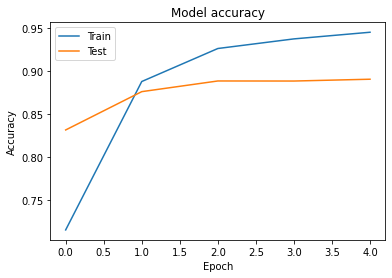

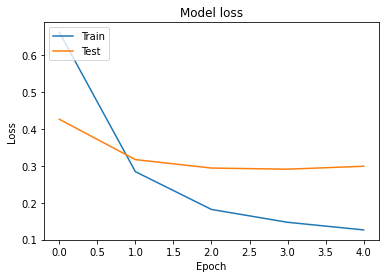

In [17]:
#Objective Breakdown:

    #Task 1: Load and clean the dataset. Remove irrelevant rows and preprocess the text.

    #Task 2: Tokenize the text and pad sequences to prepare for model input.

    #Task 3: Perform label encoding for the sentiment labels (Positive, Negative, Neutral).

    #Task 4: Define and compile a deep learning model with LSTM.

    #Task 5: Train and evaluate the model, and plot the training history.

# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the dataset (assuming CSV format with columns: 'candidate', 'sentiment', and 'text')
df = pd.read_csv("tweet.csv")

# Task 1: Data Loading and Preprocessing
# Objective: Load the tweet data, filter relevant columns, and clean the text

# Filter out relevant columns
df = df[['candidate', 'sentiment', 'text']]

# Remove the 'Irrelevant' sentiment label from the dataset early
df = df[df['sentiment'] != 'Irrelevant']

# Check and handle missing values and non-string data in the 'text' column
df['text'] = df['text'].fillna('')  # Replace NaN with empty string
df['text'] = df['text'].astype(str)  # Ensure all text data is treated as strings

# Preprocess text function
def preprocess_text(text):
    # Remove punctuation and special characters using regex
    text = re.sub(r'[^\w\s]', '', text)
    # Convert the text to lowercase
    text = text.lower()
    # Remove stopwords using NLTK stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply text preprocessing to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

# Display the first few rows after preprocessing
print("First few rows after preprocessing:")
print(df.head())

# Print unique sentiment labels before label encoding
print("Unique sentiment labels before encoding:", df['sentiment'].unique())

# Task 2: Text Vectorization
# Objective: Convert the text into numerical format using tokenization and padding

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])

# Convert texts to sequences (numerical format)
X = tokenizer.texts_to_sequences(df['text'])

# Pad sequences to ensure uniform input size
max_len = 100  # Maximum sequence length
X_pad = pad_sequences(X, maxlen=max_len)

# Task 3: Label Encoding
# Objective: Convert sentiments into numerical format (e.g., 'positive' -> 0, 'negative' -> 1, 'neutral' -> 2)

# Manually replace the sentiment labels to 0, 1, 2
df['sentiment'] = df['sentiment'].replace({
    'positive': 0,
    'negative': 1,
    'neutral': 2
})

# Label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])

# Check if label encoding worked as expected
print("Unique label classes:", label_encoder.classes_)
print("Encoded labels:", np.unique(y))

# Ensure no values are out of range (should be 0, 1, or 2 for 3 classes)
assert np.all(np.isin(y, [0, 1, 2])), "Label values are out of range"

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Task 4: Model Development
# Objective: Develop a deep learning model with Embedding, LSTM, and Dense layers

model = Sequential()

# Embedding layer for word representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))

# SpatialDropout1D to prevent overfitting
model.add(SpatialDropout1D(0.2))

# LSTM layer for sequence data processing
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))

# Dense layer for output classification
model.add(Dense(3, activation='softmax'))  # 3 classes: positive, negative, neutral

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Task 5: Model Training and Evaluation
# Objective: Train the model using categorical cross-entropy loss and accuracy metric

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test, y_test)
)

# Model evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plotting Training History (Optional)
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
